In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
file_path = "/content/drive/MyDrive/CS210_Datas/gelen turist datası/Türkiye'ye giriş yapan yabancılar/data.xlsx"
file_path2 = '/content/drive/MyDrive/CS210_Datas/Türkiye ekonomisi/kurlar.xlsx'

Mounted at /content/drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
turist_df = pd.read_excel(file_path,skiprows=3) 
kur_df = pd.read_excel(file_path2)
kur_df

,tarih,kur,Unnamed: 2,Unnamed: 3,alış,satış
0,10.05.2023,USD/TRY,1,ABD DOLARI,19.5134,19.5486
1,10.04.2023,USD/TRY,1,ABD DOLARI,19.2380,19.2727
2,10.03.2023,USD/TRY,1,ABD DOLARI,18.9374,18.9716
3,10.02.2023,USD/TRY,1,ABD DOLARI,18.8112,18.8451
4,10.01.2023,USD/TRY,1,ABD DOLARI,18.7555,18.7893
...,...,...,...,...,...,...
102,10.11.2014,USD/TRY,1,ABD DOLARI,2.2469,2.2509
103,10.10.2014,USD/TRY,1,ABD DOLARI,2.2789,2.2830
104,10.09.2014,USD/TRY,1,ABD DOLARI,2.2022,2.2062
105,11.08.2014,USD/TRY,1,ABD DOLARI,2.1489,2.1528


In [5]:
kur_df = kur_df.drop("Unnamed: 3",axis=1)
kur_df

,tarih,kur,Unnamed: 2,alış,satış
0,10.05.2023,USD/TRY,1,19.5134,19.5486
1,10.04.2023,USD/TRY,1,19.2380,19.2727
2,10.03.2023,USD/TRY,1,18.9374,18.9716
3,10.02.2023,USD/TRY,1,18.8112,18.8451
4,10.01.2023,USD/TRY,1,18.7555,18.7893
...,...,...,...,...,...
102,10.11.2014,USD/TRY,1,2.2469,2.2509
103,10.10.2014,USD/TRY,1,2.2789,2.2830
104,10.09.2014,USD/TRY,1,2.2022,2.2062
105,11.08.2014,USD/TRY,1,2.1489,2.1528


In [6]:
kur_df['tarih'] = pd.to_datetime(kur_df['tarih'], format='%d.%m.%Y')
kur_comp = kur_df.groupby(kur_df['tarih'].dt.year).mean()
kur_comp.reset_index(inplace=True)
kur_comp

<ipython-input-6-3c787893b9c0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kur_comp = kur_df.groupby(kur_df['tarih'].dt.year).mean()


,tarih,Unnamed: 2,alış,satış
0,2014,1.0,2.210100,2.213333
1,2015,1.0,2.722083,2.727025
2,2016,1.0,3.003025,3.012782
3,2017,1.0,3.661442,3.668050
4,2018,1.0,4.851017,4.859750
5,2019,1.0,5.680050,5.690275
6,2020,1.0,7.012400,7.025058
7,2021,1.0,8.771150,8.786958
8,2022,1.0,16.527858,16.557617
9,2023,1.0,19.051100,19.085460


[2.2101, 2.7220833333333334, 3.0030249999999996, 3.6614416666666667, 4.851016666666667, 5.6800500000000005, 7.0123999999999995, 8.77115, 16.527858333333334]
[36837900.0, 36244632.0, 25352213.0, 32410034.0, 39488401.0, 45058286.0, 12734213.0, 24712266.0, 44564395.0]


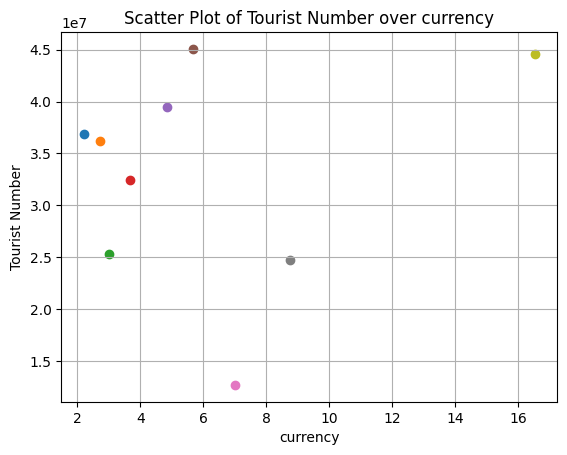

In [7]:
kur = kur_comp.loc[0:8, 'alış'].tolist()

start_year = 2014
print(kur)
turist = turist_df.loc[0, start_year:].tolist()
print(turist)


for i in range(len(kur)):
    plt.scatter(kur[i], turist[i])

plt.xlabel('currency')
plt.ylabel('Tourist Number')
plt.title('Scatter Plot of Tourist Number over currency')
plt.grid(True)
plt.show()
plt.show()

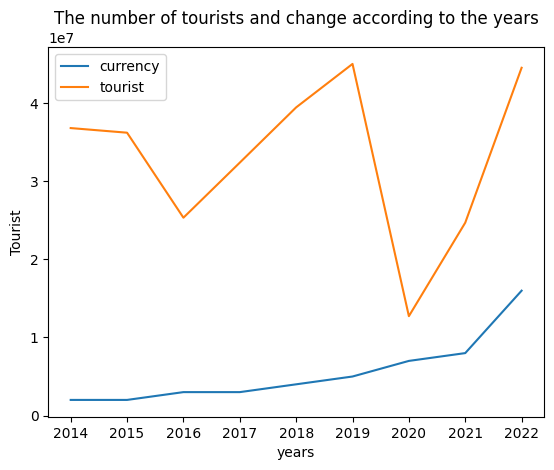

In [8]:
kur2 = []
for i in range(len(kur)):
  kur2.append(int(kur[i]) * 1000000)

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
plt.plot(years, kur2, label='currency')
plt.plot(years, turist, label='tourist')


plt.xlabel('years')
plt.ylabel('Tourist')
plt.title('The number of tourists and change according to the years')


plt.legend()


plt.show()


In [9]:
"""turist_df_trans = turist_df.transpose()
turist_df_trans.columns = turist_df_trans.iloc[0]
turist_df_trans = turist_df_trans[1:]
turist_df_trans = turist_df_trans.iloc[:, [25]]
turist_df_trans.columns.values[0] = 'USA Incoming Tourist Count'
turist_df_trans = turist_df_trans.rename_axis('Year').reset_index()
#turist_df_trans = turist_df_trans.drop(turist_df_trans.columns[0], axis=1)
turist_df_trans"""

"turist_df_trans = turist_df.transpose()\nturist_df_trans.columns = turist_df_trans.iloc[0]\nturist_df_trans = turist_df_trans[1:]\nturist_df_trans = turist_df_trans.iloc[:, [25]]\nturist_df_trans.columns.values[0] = 'USA Incoming Tourist Count'\nturist_df_trans = turist_df_trans.rename_axis('Year').reset_index()\n#turist_df_trans = turist_df_trans.drop(turist_df_trans.columns[0], axis=1)\nturist_df_trans"